# Digit Classifier:
This is an extension of the 'Simple Neural Network' which mimics the XOR gate. You can find that in the directory which goes by the same name.

---
## Data:
The MNIST database of handwritten digits with 784 features, raw data available at: [http://yann.lecun.com/exdb/mnist/](http://yann.lecun.com/exdb/mnist/). It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples.  

We will be making a 2 layer NN that classifies '0' as True and all other digits as 'False'

In [152]:
# IMPORTS:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml

In [153]:
# MNIST Database:
mnist = fetch_openml('mnist_784', )

In [154]:
X = mnist["data"]
y = mnist["target"]
m = 60000
m_test = 10000

In [155]:
# DATA PRE-PROCESSING:

y = y.astype("int32")

# Normalization/Feature-Scaling:
X /= 255

## Replacing all other numbers by 0 and all zeros by 1.
yTemp = np.zeros(y.shape[0])
yTemp[np.where(y == 0)[0]] = 1
y = yTemp

# First 60,000 examples for training.
X_train = X[:m].T # Elements are arranged column-wise.
y_train = y[:m].reshape(1, m)

# Last 10,000 example for testing.
X_test = X[-m_test:].T # Elements are arranged column-wise.
y_test = y[-m_test:].reshape(1, m_test) # Row vector

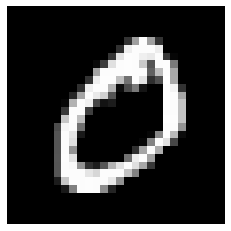

Label:  1.0


In [156]:
i = 1
plt.imshow(X_train[:,i].reshape(28,28), cmap = "gray")
plt.axis("off")
plt.show()
print("Label: ", y_train[:,i][0])

We first want to build a simple, feed-forward network with $784$ inputs($28\times28$), and a single sigmoid unit generating the output.

In [157]:
# SIGMOID ACTIVATION FUNCTION:
def sigmoid(z):
    return (1 / (1 + np.exp(-z)))

def sigmoidDerivative(z):
    return sigmoid(z)*(1 - sigmoid(z))

In [158]:
epsilon = 1e-5 # Avoids "divide-by-zero" error.

def cost(Y, Y_hat):
    L = -(1./m) * (np.sum( np.multiply(np.log(Y_hat + epsilon),Y) ) + np.sum( np.multiply(np.log(1-Y_hat + epsilon),(1-Y)) ) )
    return L

In [159]:
# GRADIENT-DESCENT PARAMETERS:
alpha = 1
N_ITERS = 300 # Can be increased, but very very slow.
N_EPOCHS = 20
n_step = N_ITERS/N_EPOCHS
# ARCHITECTURE:
n0 = X_train.shape[0] # n0=784
n1 = 64 # Hidden layer
n2 = 1 # Single output.

In [160]:
# INPUT:
A0 = X_train
# OUTPUT:
Y = y_train
# WEIGHTS: 
W1 = np.random.randn(n1, n0) * 0.01
W2 = np.random.randn(n2, n1) * 0.01
# BIAS: 
b1 = np.zeros((n1, 1))
b2 = np.zeros((n2, 1))

In [161]:
costList = []
for i in range(N_ITERS):
    
    # FORWARD-PROPOGATION:
    Z1 = np.matmul(W1,A0) + b1
    A1 = sigmoid(Z1)
    
    Z2 = np.matmul(W2,A1) + b2
    A2 = sigmoid(Z2)
    Y_hat = A2 # The prediction for all datapoints.

    # BACKWARD-PROPOGATION:
    dZ2 = A2 - Y
    dW2 = (1/m)*np.matmul(dZ2, A1.T)
    db2 = (1/m)*np.sum(dZ2, axis=1, keepdims=True)

    dZ1 = np.matmul(W2.T, dZ2)*(sigmoidDerivative(Z1))
    dW1 = (1/m)*np.matmul(dZ1, A0.T)
    db1 = (1/m)*np.sum(dZ1, axis=1, keepdims=True)
    
    # GRADIENT-DESCENT:
    W1 -= alpha*dW1
    W2 -= alpha*dW2
    b1 -= alpha*db1
    b2 -= alpha*db2
    
    if (i % n_step == 0):
        singleCost = cost(Y, Y_hat)
        costList.append(singleCost)
        print("Epoch", i, "cost: ", singleCost)

Epoch 0 cost:  0.6684886179243424
Epoch 15 cost:  0.23798885660504113
Epoch 30 cost:  0.18345533166462483
Epoch 45 cost:  0.146225386720538
Epoch 60 cost:  0.1203983493081596
Epoch 75 cost:  0.1002567491027199
Epoch 90 cost:  0.0854837576196186
Epoch 105 cost:  0.07489842737656993
Epoch 120 cost:  0.06699941522877371
Epoch 135 cost:  0.06101936120893138
Epoch 150 cost:  0.056367457670381725
Epoch 165 cost:  0.05263923807476318
Epoch 180 cost:  0.04958759256946424
Epoch 195 cost:  0.04705810591053421
Epoch 210 cost:  0.04494176163182559
Epoch 225 cost:  0.043153816270137306
Epoch 240 cost:  0.04162791912974338
Epoch 255 cost:  0.04031292133091976
Epoch 270 cost:  0.03916949451662608
Epoch 285 cost:  0.03816717543189087


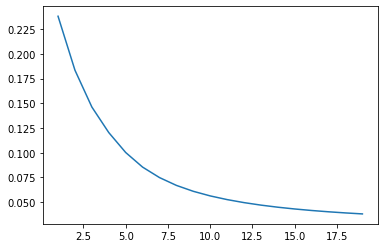

In [164]:
plt.plot(np.linspace(1, N_EPOCHS-1, N_EPOCHS-1), costList[1:]) # Ignoring the Epoch 0 cost.
plt.show()

In [167]:
# TESTING:

from sklearn.metrics import classification_report, confusion_matrix

Z1 = np.matmul(W1, X_test) + b1
A1 = sigmoid(Z1)

Z2 = np.matmul(W2, A1) + b2
A2 = sigmoid(Z2)

predictions = np.round(A2)[0,:]
labels = y_test[0,:]

print("Confusion matrix: \n", confusion_matrix(predictions, labels), "\n")
print("Classification report: \n", classification_report(predictions, labels))

Confusion matrix: 
 [[8961   47]
 [  59  933]] 

Classification report: 
               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      9008
         1.0       0.95      0.94      0.95       992

    accuracy                           0.99     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.99      0.99      0.99     10000

